In [143]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [144]:
import pandas as pd

bank_data = pd.read_csv("bank-marketing.csv", delimiter=';')
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [145]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [146]:
categorical_cols = ['job','marital','education','default','housing','loan',
                    'contact','month','day_of_week','poutcome']

In [147]:
pre = pd.get_dummies(bank_data, columns=categorical_cols, drop_first=True)

In [148]:
from sklearn.model_selection import train_test_split

# Split features (X) and target (y)
X = pre.drop('y', axis=1)
y = pre['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [149]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:

y_pred = rf.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix
print("confusion matrix",confusion_matrix(y_pred,y_test))

confusion matrix [[7119  469]
 [ 222  428]]


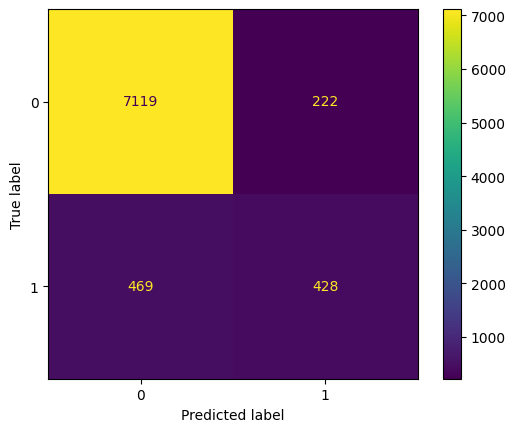

In [152]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
dp=confusion_matrix(y_test,y_pred)
sdf=ConfusionMatrixDisplay(confusion_matrix=dp)
sdf.plot()

In [153]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
print("accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))

accuracy: 0.9161204175770818
precision: 0.6584615384615384
f1_score: 0.5533290239172592
recall score: 0.47714604236343366


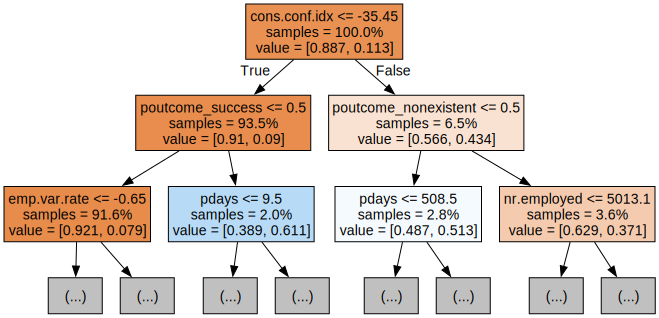

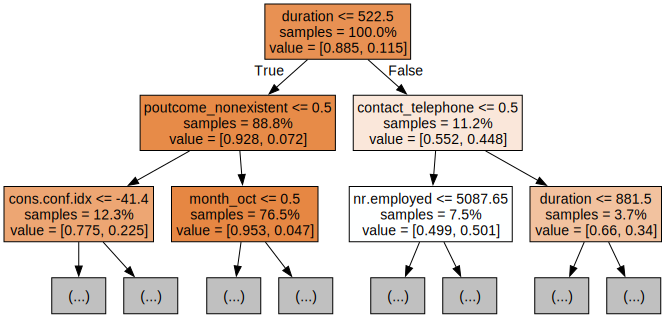

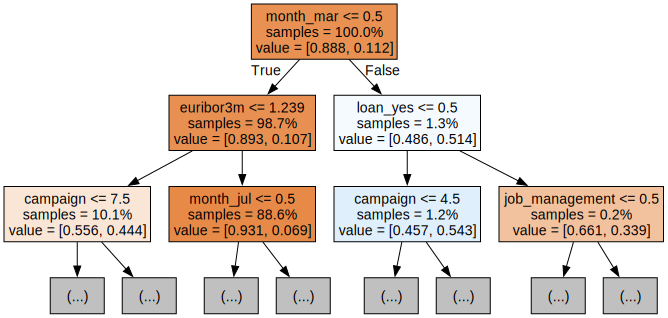

In [154]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)